# Presentation

In this workbook we gonna implement a Genetic Algorithm to find a good solution (can be different to the optimal one) to the <a href="https://en.wikipedia.org/wiki/Travelling_salesman_problem" taraget="_blank">Traveling Salesman Problem</a>.

This problem is well known as it is a part of the NP-Complet Problem in in combinatorial optimization and theoretical computer science.

The principle is simple : <br/>
<i>Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once?</i>

To do so, we can think about creating all combinations on path, calculate every distances and keep the shortest one. The issue with this solution is the combinatory explosion. For example, if you consider only 70 cities, you have :

$$\begin{eqnarray}
Nb_{path} &=& Nb_{cities}! => 1.19 * 10^{100} \text{ with 70 cities}
\end{eqnarray}$$

If we consider a computer able to run 1 000 000 paths par seconds, you will need 3.8 * 10^86 years ... Impossible

One good solution in such cases is to go for Genetic Algorithms

To know more how it works you can take a look to <a href="https://en.wikipedia.org/wiki/Genetic_algorithm" target="_blank">this webpage</a>.

Now let's code it ! (For information, a version with an OpenGL visualization is available on <a href="https://github.com/Coni63/scripts_Python/blob/master/Python_Scripts/Algo%20genetique/2eme%20-%20TS%20Problem/script_opengl_cleaner.py" target="_blank">my github</a>)

In [1]:
import random
import math
import matplotlib.pyplot as plt

%matplotlib inline

For this problem, we can considere a mutation as the swap of 2 points. We cannot exchange only a point by another one as all points must be only once in the path.
Also for the crossover, usually we should keep the beginning of one element of the population and finish with the end of another one. The invert is done on the other element. Unfortunately, this cannot be done as simply in this example for the same reason (we cannot go twice in the same city or no go in one). So for this we only cut the fist element and fill the end with non visited cities in the order of the second list. for e.g. :

A = [2, 4, 5, 3, 1] <br/>
B = [1, 5, 4, 3, 2] <br/>
if we cut A at position 3, we have :

A = [2, 4, 5] + [1, 3] as 1 is before 3 in B and both are not in A[:3]



In [2]:
class Individu:
    def __init__(self, P):
        self.path = P
        self.score = 0
        self.set_score()

    def set_score(self):
        for i in range(len(self.path) - 1):
            self.score += math.pow(self.path[i+1][0] - self.path[i][0], 2) + \
                          math.pow(self.path[i+1][1] - self.path[i][1], 2)

    def __repr__(self):
        return "{} - {}".format(self.path, self.fitness)

    def mutate(self):
        a = random.randrange(len(self.path))
        b = random.randrange(len(self.path))
        new_path = self.path[:]
        new_path[a], new_path[b] = new_path[b], new_path[a]
        return [Individu(new_path)]

    def cross_over(self, other):
        a = random.randrange(len(self.path))
        b = random.randrange(len(self.path))
        if a != b :
            start = min(a, b)
            end = max(a, b)
        else:
            start = 0
            end = len(self.path) // 2

        new1 = self.path[start:end]
        new2 = self.path[:start] + self.path[end:]
        for each in other.path:
            if each not in new1:
                new1 += [each]
        for each in self.path:
            if each not in new2:
                new2 += [each]

        return [Individu(new1), Individu(new2)]

Now we can setup our problem

In [3]:
nb_cities = 35
best_every_gen = []
w, h = 1000, 1000 #space for cities

#define genetic parameter
mutation_ratio = 5e-1
cross_ratio = 0.7
population = 100
population_list = []

setup the list of cities and the population

In [4]:
cities = [( random.randrange(w), random.randrange(h) ) for _ in range(nb_cities)]

In [5]:
for i in range(population):
    random.shuffle(cities)
    population_list.append(Individu(cities[:]))

And we can now run the main script. For this example we just gonna stop the while loop if we reach 1000 generations or 100 time that the script find a better path. This is beacuse this script can run forever. If there is improvement we gonna store the generation, the distance for later visulization. We algo gonna store the best solution.

In [6]:
improvement = 0
previous_best = 1e20
max_generation = 1000
current_generation = 0

while current_generation < max_generation and improvement < 100:
    # ranking
    population_list.sort(key = lambda x : x.score)
    
    # Selection
    to_delete = population_list[population//2:]
    population_list = population_list[:population//2]

    # Delete all instances not kept to free memory
    for each in to_delete:
        del each
    
    # For each remaining elements, we do crossover
    new_indiv = []
    for elem in population_list:
        if random.random() < cross_ratio and len(new_indiv) < population//2:
            elem2 = random.choice(population_list)
            while elem == elem2:
                elem = random.choice(population_list)
            new_indiv += elem.cross_over(elem2)

    # and mutation
    for each in population_list:
        if random.random() <= mutation_ratio:
            new_indiv += each.mutate()

    population_list.extend(new_indiv)
    
    best_this_generation = population_list[0].score
    if best_this_generation < previous_best:
        previous_best = best_this_generation
        improvement += 1
        best_every_gen.append((current_generation, best_this_generation))
        print(current_generation, best_this_generation)
        final_elem = population_list[0]
    
    current_generation += 1        

0 8169213.0
1 7210838.0
3 7115587.0
4 6691361.0
5 6342851.0
6 6063481.0
10 5915977.0
11 5428073.0
13 5308518.0
14 5242572.0
15 5102632.0
16 3980039.0
17 3880407.0
19 3693373.0
20 3647901.0
22 3523523.0
23 3296721.0
25 3201012.0
27 3035474.0
28 2612279.0
29 2457209.0
34 2211432.0
40 2193004.0
42 2123133.0
43 1909995.0
45 1771468.0
50 1717986.0
54 1654107.0
56 1581695.0
60 1562745.0
62 1442461.0
64 1421059.0
65 1419408.0
67 1416651.0
70 1410354.0
79 1407161.0
80 1378423.0
83 1367116.0
86 1306022.0
87 1290399.0
93 1271640.0
96 1217769.0
117 1206449.0
123 1189159.0
124 1153555.0
135 1118189.0
154 1109329.0
163 1097462.0
169 1096498.0
176 1088506.0
177 1078298.0
178 1072534.0
181 1068700.0
199 1032816.0
228 996730.0
262 965460.0
292 962902.0
300 956868.0
318 953234.0
334 947200.0
405 917354.0
515 909322.0


We can now check distances related to generations by unzipping values from best_every_gen

In [7]:
X, Y = zip(*best_every_gen)
print(X, "\n\n", Y)

(0, 1, 3, 4, 5, 6, 10, 11, 13, 14, 15, 16, 17, 19, 20, 22, 23, 25, 27, 28, 29, 34, 40, 42, 43, 45, 50, 54, 56, 60, 62, 64, 65, 67, 70, 79, 80, 83, 86, 87, 93, 96, 117, 123, 124, 135, 154, 163, 169, 176, 177, 178, 181, 199, 228, 262, 292, 300, 318, 334, 405, 515) 

 (8169213.0, 7210838.0, 7115587.0, 6691361.0, 6342851.0, 6063481.0, 5915977.0, 5428073.0, 5308518.0, 5242572.0, 5102632.0, 3980039.0, 3880407.0, 3693373.0, 3647901.0, 3523523.0, 3296721.0, 3201012.0, 3035474.0, 2612279.0, 2457209.0, 2211432.0, 2193004.0, 2123133.0, 1909995.0, 1771468.0, 1717986.0, 1654107.0, 1581695.0, 1562745.0, 1442461.0, 1421059.0, 1419408.0, 1416651.0, 1410354.0, 1407161.0, 1378423.0, 1367116.0, 1306022.0, 1290399.0, 1271640.0, 1217769.0, 1206449.0, 1189159.0, 1153555.0, 1118189.0, 1109329.0, 1097462.0, 1096498.0, 1088506.0, 1078298.0, 1072534.0, 1068700.0, 1032816.0, 996730.0, 965460.0, 962902.0, 956868.0, 953234.0, 947200.0, 917354.0, 909322.0)


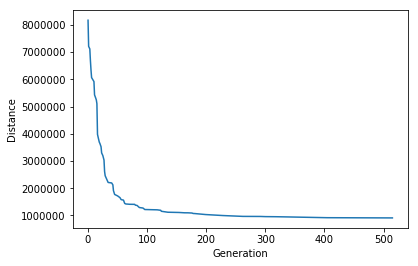

In [8]:
plt.plot(X, Y)
plt.xlabel('Generation')
plt.ylabel('Distance')
plt.show()

We can see that we divided by around 8 the traveling distances in around 200 generations. Originally we generate 100 samples for the population, then we generated around 50 new samples per generation with crossover and mutation. So we succeed to find a stable minimum with only 10 100 samples instead of 35! (= 10^40). As this path remains stable for around 200 other generation, that means that this distance is a minimum (maybe only locale) stable. If, now we look at the steps at the beginning, it's not really stable as we can find a clearly better path few generations after. The main advantage of this solution is that we can quickly get a good result but you cannot be sure that this is the best one ...

As we stored the best element, we can also display his path between every cities.

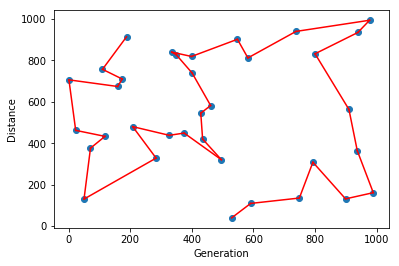

In [9]:
X, Y = zip(*cities)
plt.scatter(X, Y)

for i in range(1, nb_cities):
    X, Y = zip(*final_elem.path[i-1:i+1])
    plt.plot(X, Y, color="red")

plt.xlabel('Generation')
plt.ylabel('Distance')
plt.show()

As we can see, the path is pretty logical and looks not so bad, but again we cannot confirm that this is the best path, it's only a good path. If we go for generation and with a very long time there is no improvement we could assume that this is the best path but with only 1000 generation or 100 improvements, it's difficult to confirm this.